In [7]:
import nfp
from cascade.apply import predict_NMR_C,predict_NMR_H
from cascade.tfmodel import NMR_model_C, NMR_model_H

In [8]:
outC = predict_NMR_C("CCN=[N+]=[N-]", NMR_model_C)

   ------------------------------------------------------------------------------------------------------------------
   |    FULL_MONTE search                                                                                           |
   | o  EWIN: 10.0 kcal/mol                                                                                         |
   | o  MCNV: 2 ROTATABLE BONDS                                                                                     |
   | o  STEP: 200 (ESTIMATED CONFORMER SPACE: 8)                                                                    |
   ------------------------------------------------------------------------------------------------------------------



3it [00:00, 176.21it/s]

o  FILTERING CONFORMERS BY ENERGY CUTOFF: 10.0 kcal/mol
   KEEPING 200 CONFORMERS
o  FILTERING CONFORMERS BY RMS: 0.5
   KEEPING 3 CONFORMERS


In [9]:
outC

([<rdkit.Chem.rdchem.RWMol at 0x7fa44bcbcce0>,
    mol_id  atom_index  Shift
 0       0           1  14.37
 1       0           2  46.64,
    atom_index cf_id mol_id  relative_E  predicted  b_weight
 0           1   195      0        0.00      14.18      1.00
 1           2   195      0        0.00      47.06      1.00
 0           1   129      0        0.64      14.64      0.34
 1           2   129      0        0.64      46.02      0.34
 0           1     5      0        0.64      14.64      0.34
 1           2     5      0        0.64      46.02      0.34)

In [10]:
mol0 = outC[0][0]

In [11]:
# Source: https://www.herongyang.com/Cheminformatics/RDKit-rdkit-Chem-Draw-rdMolDraw2D-MolDraw2DSVG-SVG.html

from rdkit.Chem.Draw import rdMolDraw2D
import IPython.display

def display_molecule(mol):
    d = rdMolDraw2D.MolDraw2DSVG(300, 300)
    # Iterate over the atoms
    for atom in mol.GetAtoms():
        # For each atom, set the property "atomNote" to a index+1 of the atom
        atom.SetProp("atomNote", str(atom.GetIdx()+1))
    d.DrawMolecule(mol, )
    d.FinishDrawing()
    p = d.GetDrawingText()


    i = IPython.display.SVG(p)
    display(i)

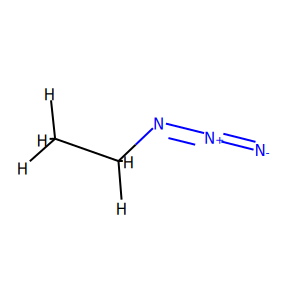

In [12]:
display_molecule(mol0)

In [13]:
# Iterate over the atoms
for atom in mol.GetAtoms():
    # For each atom, set the property "atomNote" to a index+1 of the atom
    atom.SetProp("atomNote", str(atom.GetIdx()+1))

mol

NameError: name 'mol' is not defined

In [ ]:
# Save first conformer as sdf using RDKit
from rdkit import Chem
w = Chem.SDWriter('mol0.sdf')
w.write(mol0)
w.close()
